# Welcome to All About Regularization 👍

<div style="display:fill;
           border-radius:5px;
           background-color: lightblue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
    Welcome back! If you are new here, I'm currently a computer science student, an avid number nerd, an aspiring researcher who publishes <a href="https://www.kaggle.com/code/kimmik123/all-about-linear-regression">notebooks on certain topics</a> that I hope can guide and inspire beginners throughout their journey in Kaggle and beyond. 
</p>
</div>

### For today's notebook, I want to talk about regularization. 
### Machine Learning and AI in general can be thought of as a machine learning from a set number of examples provided by the dataset. 
### One error that can happen from this is that our algorithm will learn the specifics of the dataset instead of the general meaning/theme of the data. 
### This is where regularization techinque comes into play. 

<div style="display:fill;
           border-radius:5px;
           background-color: lightblue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;
          text-align: center;
          font-size:20px;">
    <b>What is it?</b>
</p>
</div>

### To fully understand regularization, we need to take a few steps back to the fundamental idea of **bias** and **variance**. 
### Simply put, bias is a measure of how accurately the model fits to the dataset. 
### While variance is a measure of the variance of the performance when fitted to different datasets. 
### Now usually, when the model's bias decreases, the variance can be seen to increase. 
### This happens when we use a more complex model, for instance from linear regression to a neural network. 
### However, when this happens, the variance would increase if there are no regularization practices in place. 

### So when we say we have to implement regularization, we are saying that we need to lower the variance of our model's performance. 
### Without such regularization, our model would experience something called **overfitting**. 
### Overfitting is dangerous as it can give a false sense of assurance that our model is performing extremely well. 
### This is why practioners would utilize a training and testing dataset. 

### First, we fit our model using the training dataset. 
### Afterwards, we test to check our model's performance on the testing dataset. 
### By doing so, we expose our model to a dataset it hasn't been trained on. 
### If we see that the training performance is getting better but the testing performance is worsening, we know that this is a symptom of overfitting. 

<div style="display:fill;
           border-radius:5px;
           background-color: lightblue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;
          text-align: center;
          font-size:20px;">
    <b>Regularization Techniques</b>
</p>
</div>

### So let me show you some techniques that we have for regularization. 
### First of them is the train test split package from sklearn. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('/kaggle/input/breast-cancer/Breast_Cancer.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [3]:
columns = list(df.columns)

X = df[columns[:-1]]
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(f"We have {len(X_train)} number of training data and {len(X_test)} number of testing data")

We have 2696 number of training data and 1328 number of testing data


### As we can see, we have a set of training data and a smaller set of testing data to fully test our model's performance. 

### This is a very simple and a given method to perform before any machine learning task. 
### However, for the majority of this notebook, I wish to talk about a more complex method to undertake the problem of overfitting. 
### They are known as the L1 and L2 regularization methods. 

<div style="display:fill;
           border-radius:5px;
           background-color: lightblue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;
          text-align: center;
          font-size:20px;">
    <b>L1 and L2 regularization</b>
</p>
</div>

### When it comes to regularization techniques, L1 and L2 regularization often comes into everyone's mind. 
### Let me explain what these two techniques do. 

### Firstly, L1 regularization is known as the **Lasso Regularization**. 
### The formula is as follows.

$$\LARGE min_{w^{(i)}}[ \lambda \cdot \sum_{i=1}^{N} |w^{i}| + \frac{1}{N} \cdot \sum_{i=1}^{N}(f(x_{i}) - y)^2]$$

### L1 regularization adds a penalty on the sum of the absolute values of the model weights.
### The lambda is a hyperparameter for this technique. 
### The greater the lambda value, the stronger it would curb overfitting. 
### However, too high a value could result in the model underfitting, which is the problem where the model is not able to learn the patterns from the data. 

### L1 regularization tends to result in weights that are not contributing to the model will be zeroed. 
### This makes this technique especially useful for feature selection and for sparse models, which is where most parameters are of value zero. 
### You can understand it as the technique helping to keep only the relevant weights as non-relevant weights would only increase the loss value. 

### The L2 regularization is known as the **Ridge Regularization**.
### The formula is as follows. 

$$\LARGE min_{w^{(i)}}[ \lambda \cdot (\sum_{i=1}^{N} |w^{i}|)^{2} + \frac{1}{N} \cdot \sum_{i=1}^{N}(f(x_{i}) - y)^2]$$

### With this technique, larger weights are reduced but not zeroed. 
### This is very useful when you know the features are highly correlated as it keeps them in the game but evenly spreads out the distribution of these weights. 
### Also, it is helpful when our data is noisy.

<div style="display:fill;
           border-radius:5px;
           background-color: lightblue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;
          text-align: center;
          font-size:20px;">
    <b>Example</b>
</p>
</div>

### Now let us put all of these into a working classification example. 
### I will show you how regularized logistic regression works in this case and showcase some visualization so you can see the effect of these regularization.

In [4]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score   
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

le = preprocessing.LabelEncoder()
for col in list(df.select_dtypes(include=["object"]).columns): # Label Encoding for Logistic Regression model 
    df[col] = le.fit_transform(df[col])
    
ss = StandardScaler()
columns = list(df.columns)

y = df['Status']

df = ss.fit_transform(df)
df = pd.DataFrame(df, columns = columns)

X = df[columns[:-1]]

In [5]:
def visualize(X=X, y=y, reg='l1'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    coefs = []
    train_scores = []
    test_scores = []
    C_arr = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    # Fitting and scoring
    for c in C_arr:
        model = LogisticRegression(penalty=reg, solver='liblinear', C = c).fit(X_train,y_train)
        train_scores.append(model.score(X_train, y_train))
        test_scores.append(model.score(X_test, y_test))
        coefs.append(model.coef_.ravel())
        
    # Plotting for the scores
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
    ax1.plot(C_arr, train_scores, 'b-o', label='Training Set')
    ax1.plot(C_arr, test_scores, 'r-o', label='Test Set')
    plt.suptitle(f'{reg} regularization')
    ax1.set_xlabel('C')
    ax1.set_ylabel('Accuracy')
    ax1.set_xscale('log')
    ax1.set_title('Performance')
    ax1.legend()
    
    # Plotting the coefficients
    coefs = np.array(coefs)
    n_params = coefs.shape[1]
    for i in range(n_params):
        ax2.plot(C_arr, coefs[:, i], label=X.columns[i])
    #ax2.axhline(y=0, linestyle='--', color='black', linewidth=2)
    ax2.set_xlabel('C')
    ax2.set_ylabel('Coefficient values')
    ax2.set_xscale('log')
    ax2.set_title('Coefficients')
    plt.show()

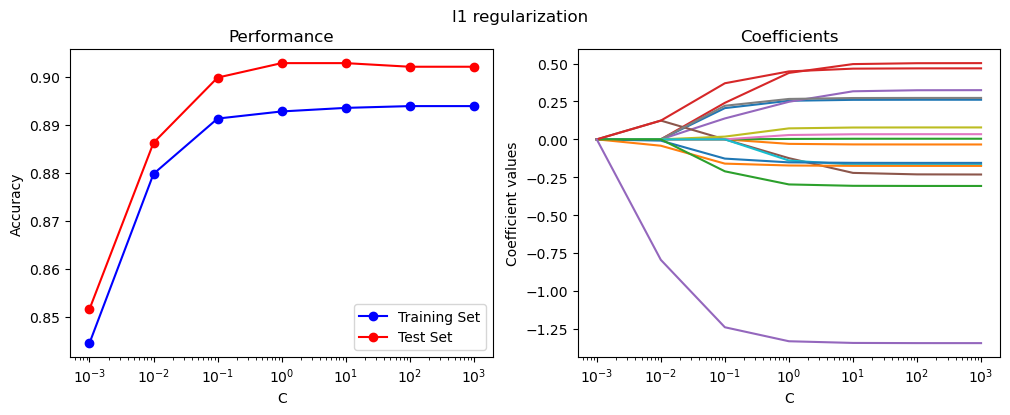

In [6]:
visualize(reg='l1')

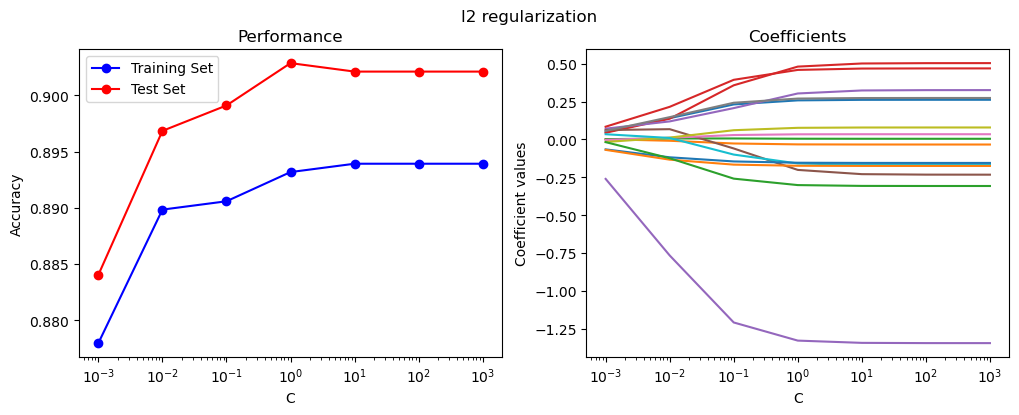

In [7]:
visualize(reg='l2')

### As we can see, our model performs superb, even better than I thought. 
### There is no sign of overfitting as our training score doesn't surpass that of the test score. 
### The one thing we can observe is how the model's parameters/coefficients remains diversified when using L2 regularization. 
### This is just as we expected. 
### Meanwhile, when using L1 regularization, our coefficients are drastically changed, either increased or reduced. 

<div style="display:fill;
           border-radius:5px;
           background-color: lightblue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;
          text-align: center;
          font-size:20px;">
    <b>Conclusion</b>
</p>
</div>

### As we observed from the above example, regularization can be of immense help, especially when our model becomes more complicated and datasets becomes larger. 
### To prevent overfitting is one of the most important tasks for any machine learning problems. 
### Overfitting to a certain dataset can result in awful performance on the test dataset, or worse, when put to real life applications. 
### I hope you took away some lessons as to how regularization works and how and when to use them. 
### See you in the next one!

<div style="display:fill;
           border-radius:5px;
           background-color: lightblue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;
          text-align: center;
          font-size:20px;">
    <b>Credits</b>
</p>
</div>

* https://towardsdatascience.com/l1-vs-l2-regularization-in-machine-learning-differences-advantages-and-how-to-apply-them-in-72eb12f102b5